In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data into Python environment.

In [12]:
data=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [13]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


 # Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [14]:
data["date_index"] = data["Date_month_year"] + " " + data["Time"]
data["date_index"] = pd.to_datetime(data["date_index"])
data["Date_month_year"] = pd.to_datetime(data["Date_month_year"])
data = data.set_index(data["date_index"])

In [15]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


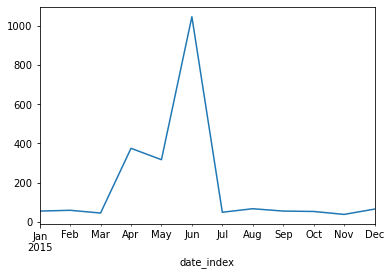

In [16]:
data.groupby(pd.Grouper(freq="M")).size().plot()
plt.show()

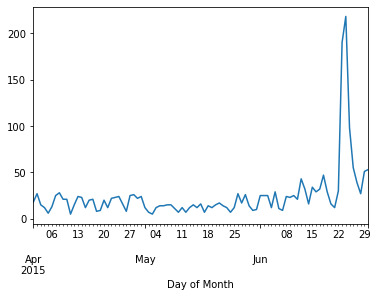

In [20]:
data['Day of Month'] = pd.to_datetime(data["Date"])
data = data.set_index(data["Day of Month"])
data.groupby(pd.Grouper(freq="D")).size().plot()
plt.show()

# Provide a table with the frequency of complaint types.

In [27]:
data["Customer Complaint"].str.upper().value_counts().head(30)

COMCAST                               102
COMCAST DATA CAP                       30
COMCAST INTERNET                       29
COMCAST DATA CAPS                      21
COMCAST BILLING                        18
COMCAST SERVICE                        15
INTERNET SPEED                         15
UNFAIR BILLING PRACTICES               13
DATA CAPS                              13
DATA CAP                               12
COMCAST COMPLAINT                      11
COMCAST/XFINITY                        11
COMCAST INTERNET SERVICE               10
BILLING                                 9
BILLING ISSUES                          8
COMCAST CABLE                           5
INTERNET                                5
COMCAST BILLING COMPLAINT               5
COMCAST ISSUES                          5
COMCAST BILLING PRACTICES               5
SERVICE ISSUES                          5
SLOW INTERNET                           5
INTERNET SERVICE                        5
COMPLAINT AGAINST COMCAST         

#  Create a new categorical variable
with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [29]:
data["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for 
                     Status in data["Status"]]

In [31]:
df_status = data.groupby('State').newStatus.value_counts().unstack()

In [32]:
df_status.head(25)

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


 # Provide state wise status of complaints in a stacked bar chart.

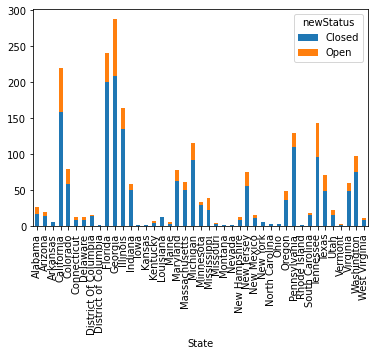

In [47]:
df_status.plot(kind='bar', stacked=True)
plt.show()

# Which state has the maximum complaints

From above graph it is observed that Georgia has maximum number of complaints

# Which state has the highest percentage of unresolved complaints

In [54]:
# Unresolved complaints distribution across State
unresolved = data[data['newStatus']=='Open']
unresolved = unresolved['State'].value_counts()
unresolved.head(25)

Georgia          80
California       61
Tennessee        47
Florida          39
Illinois         29
Michigan         23
Washington       23
Texas            22
Colorado         22
Pennsylvania     20
New Jersey       19
Mississippi      16
Maryland         15
Oregon           13
Massachusetts    11
Virginia         11
Indiana           9
Alabama           9
Arizona           6
Utah              6
New Hampshire     4
Delaware          4
Minnesota         4
New Mexico        4
Connecticut       3
Name: State, dtype: int64

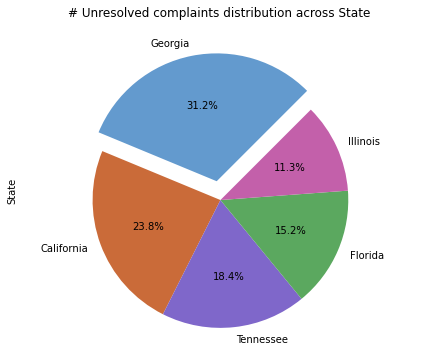

In [59]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
unresolved.head().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (6,5))
plt.axis('equal')
plt.title('# Unresolved complaints distribution across State\n')
plt.tight_layout()
plt.show()

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [60]:
resolved = data[data['Received Via'].isin(['Internet','Customer Care Call'])]
resolved.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day of Month,newStatus
Day of Month,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed


In [61]:
resolved['newStatus'].value_counts()

Closed    1707
Open       517
Name: newStatus, dtype: int64

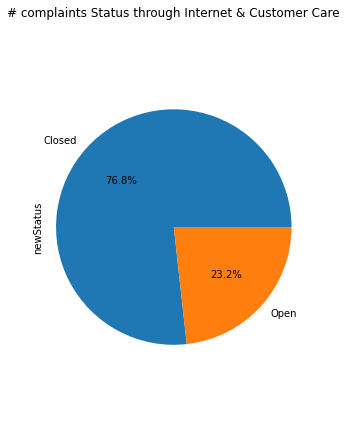

In [70]:
resolved['newStatus'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize = (4,6))
plt.axis('equal')
plt.title('# complaints Status through Internet & Customer Care\n')
plt.tight_layout()
plt.show()

In [75]:
(resolved['newStatus']=='Closed').value_counts()

True     1707
False     517
Name: newStatus, dtype: int64

So the percentage of complaints resolved till date, which were received through the Internet and customer care calls is 76.8%